#Sentiment Analysis with Twitter Data set.

In [1]:
#some import important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data set

In [2]:
#load the data set 
train = pd.read_csv("/content/drive/MyDrive/train.csv") 
test = pd.read_csv("/content/drive/MyDrive/test.csv")

Exploratery Data Analysis

In [3]:
#the shape of train data set and test data set
print("shape of the Train data set:",train.shape)
print("SHape of the Test Data set:", test.shape)

shape of the Train data set: (31962, 3)
SHape of the Test Data set: (17197, 2)


In [4]:
#How to check head section in train data set
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#how to check head section in test data set
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
#How to check nan values in whole data set
print(train.isnull().sum())
print(test.isnull().sum())

id       0
label    0
tweet    0
dtype: int64
id       0
tweet    0
dtype: int64


In [7]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [8]:
#how to check column in train and test data set
print("columns of train data set:",train.columns)
print("columns of test data set:",test.columns)

columns of train data set: Index(['id', 'label', 'tweet'], dtype='object')
columns of test data set: Index(['id', 'tweet'], dtype='object')


In [9]:
#Cheacking out the negative comment on train set
train[train['label']== 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [10]:
#cheacking out the positive comment on train data set
train[train['label']== 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


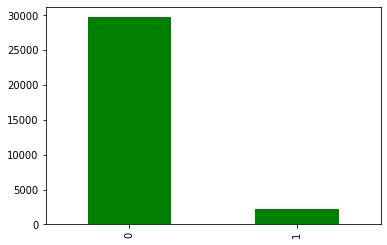

In [11]:
#how to count values
train['label'].value_counts().plot.bar(color='green', figsize=(6,4))

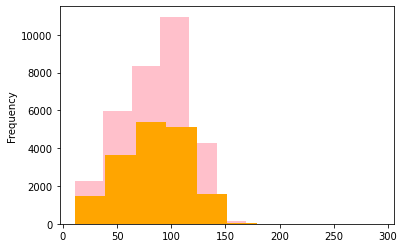

In [12]:
# checking the distribution of tweets in the data
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [14]:
train.groupby('label').describe()

id                                   ...   len                    
         count          mean          std   min  ...   25%   50%    75%    max
label                                            ...                          
0      29720.0  15974.454441  9223.783469   1.0  ...  62.0  88.0  107.0  274.0
1       2242.0  16074.896075  9267.955758  14.0  ...  69.0  96.0  111.0  152.0

[2 rows x 16 columns]

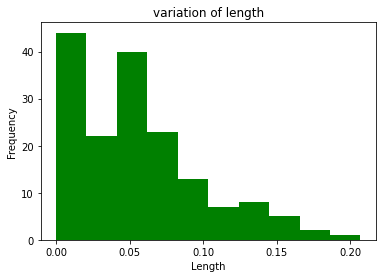

In [15]:
train.groupby('len').mean()['label'].plot.hist(color = 'green', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Feature extraction using CountVectorizer

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

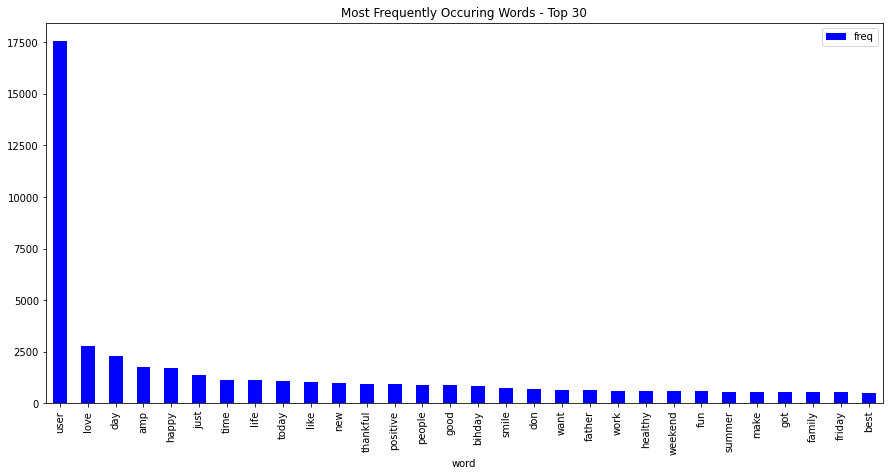

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

World Cloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

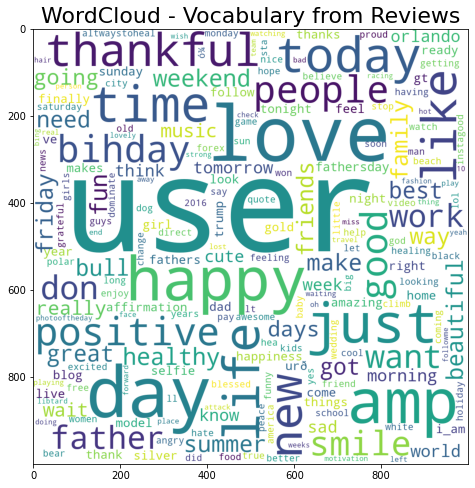

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

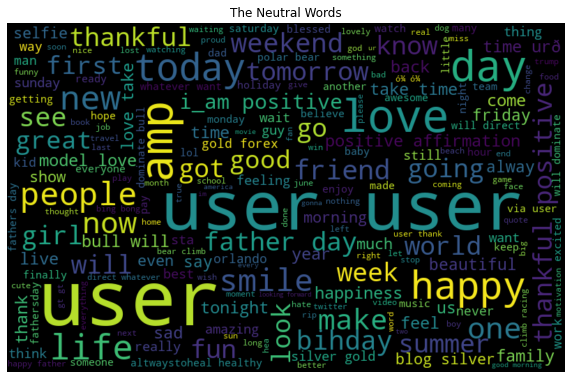

In [18]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

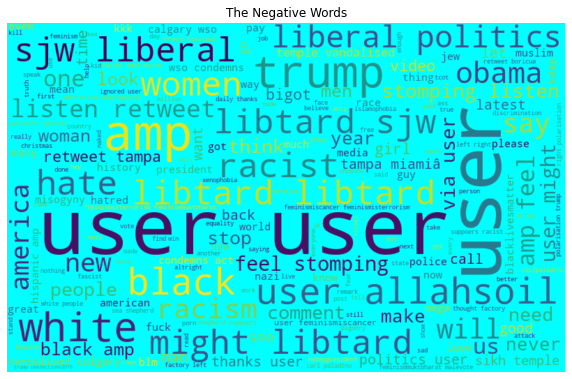

In [19]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [20]:
# collecting the hashtags
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
# extracting hashtags from non racist/sexist tweets
import re
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

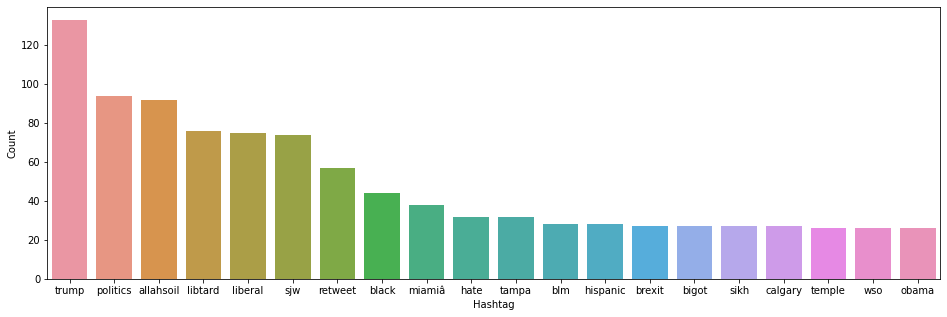

In [22]:
import nltk
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6108663, 8411580)

In [24]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6490886211395264),
 ('#wanderlust', 0.6200023889541626),
 ('enroute', 0.6018702387809753),
 ('podium', 0.594036340713501),
 ('#chilled', 0.5926948189735413),
 ('sister!!', 0.5925700068473816),
 ('#boardgames', 0.5920306444168091),
 ('#travelling', 0.5909935832023621),
 ('#restaurant', 0.588028073310852),
 ('coaching', 0.5847466588020325)]

In [25]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7249269485473633),
 ('mytraining', 0.7240675687789917),
 ('training"', 0.70468670129776),
 ('app,', 0.679318904876709),
 ('"my', 0.6239320039749146),
 ('app', 0.6009559631347656),
 ('mp3', 0.593080461025238),
 ('ios', 0.5807259678840637),
 ('ta', 0.5796486139297485),
 ("domino's", 0.5761761665344238)]

In [26]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', -0.002388373017311096),
 ('#games', -0.05432187765836716),
 ('#hype', -0.05497357249259949),
 ('members', -0.062368717044591904),
 ('ð\x9f\x98\x81', -0.06373712420463562),
 ('#yay', -0.0674881860613823),
 ('#wednesdaywisdom', -0.07372187077999115),
 ('us.', -0.07675199955701828),
 ('excited', -0.07695093750953674),
 ('#nervous', -0.08400341868400574)]

In [27]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [28]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [29]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [31]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [32]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [33]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [34]:
#standardization

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

Model Building

Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9519459391815793
F1 score : 0.6089613034623217
[[7308  124]
 [ 260  299]]


Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


XGB Classifier

In [37]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9445997246673064
Validation Accuracy : 0.9433112251282693
f1 score : 0.35378031383737524
[[7414   18]
 [ 435  124]]


#Surge Price prediction of a cab aggregator.

In [38]:
#Import some important library
import pandas as pd
from plotly import express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import normalize
from xgboost import XGBClassifier

Load the Data set

In [39]:
df = pd.read_csv("/content/drive/MyDrive/sigma_cabs.csv")

Exploratery Data Analysis

In [40]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [41]:
#how to check nan values
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [42]:
#how to count values 
df["Type_of_Cab"].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [43]:
#how to fill nan values
df["Type_of_Cab"] = df["Type_of_Cab"].fillna("F")

In [44]:
#how to count values
df["Life_Style_Index"].value_counts()

2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
           ..
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64

In [45]:
#statistical description
df["Life_Style_Index"].describe()

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64

In [46]:
#count the values
df["Confidence_Life_Style_Index"].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [47]:
#how to check nan values
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [48]:
#define correlation
df.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686,0.185646
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993,-0.040735
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


In [49]:
#remove the nan values
df = df.dropna(subset=["Life_Style_Index"])

In [50]:
#how to check nan values
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5063
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           60099
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [51]:
sum = 0
count = 0
avg = 0
for  i in df["Customer_Since_Months"].value_counts().iteritems():
    count += i[1]
    sum += i[0]*i[1]
avg = round(sum/count,0)
df["Customer_Since_Months"] = df["Customer_Since_Months"].fillna(avg)

In [52]:
#fill the nan values
df["Var1"] = df["Var1"].fillna(25)

In [53]:
#how to check nan values
df.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

One hot encoding

In [54]:
def one_hot_encoding(column):
     df = pd.get_dummies(column,drop_first=True)
     return df

In [55]:
Type_Of_Cab = one_hot_encoding(df["Type_of_Cab"])
Confidence_Life_Style_Index = one_hot_encoding(df["Confidence_Life_Style_Index"])
Destination_Type = one_hot_encoding(df["Destination_Type"])
Gender = one_hot_encoding(df["Gender"])
Type_Of_Cab = Type_Of_Cab.rename(columns={'B': 'Type_Of_Cab_B','C': 'Type_Of_Cab_C','D': 'Type_Of_Cab_D','E': 'Type_Of_Cab_E','F': 'Type_Of_Cab_F'})
Confidence_Life_Style_Index = Confidence_Life_Style_Index.rename(columns = {"B":"Confidence_Life_Style_Index_B","C":"Confidence_Life_Style_Index_C"})
Destination_Type = Destination_Type.rename(columns = {'B':'Destination_Type_B','C':'Destination_Type_C','D':'Destination_Type_D','E':'Destination_Type_E','F':'Destination_Type_F','G':'Destination_Type_G','H':'Destination_Type_H','I':'Destination_Type_I','J':'Destination_Type_J','K':'Destination_Type_K','L':'Destination_Type_L','M':'Destination_Type_M','N':'Destination_Type_N'})
print("Columns name changed Succesfully !!")

Columns name changed Succesfully !!


In [56]:
df_one_hot_encoded = pd.concat([df,Type_Of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender], axis=1)

In [57]:
df_one_hot_encoded

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Type_Of_Cab_B,Type_Of_Cab_C,Type_Of_Cab_D,Type_Of_Cab_E,Type_Of_Cab_F,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Male
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,25.0,63,88,Male,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,25.0,48,75,Female,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
cols_to_drop = ["Trip_ID","Type_of_Cab","Confidence_Life_Style_Index","Destination_Type","Gender"]
df_final = df_one_hot_encoded.drop(cols_to_drop,axis = 1)

In [59]:
cols_to_be_normalized = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index','Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']
cols_not_to_be_normalized = ['Type_Of_Cab_B', 'Type_Of_Cab_C', 'Type_Of_Cab_D', 'Type_Of_Cab_E','Type_Of_Cab_F', 
                            'Confidence_Life_Style_Index_B','Confidence_Life_Style_Index_C', 'Destination_Type_B',
                            'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
                            'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
                            'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
                            'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
                            'Male','Surge_Pricing_Type']

In [60]:
cols_to_be_normalized

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3']

In [61]:
cols_not_to_be_normalized

['Type_Of_Cab_B',
 'Type_Of_Cab_C',
 'Type_Of_Cab_D',
 'Type_Of_Cab_E',
 'Type_Of_Cab_F',
 'Confidence_Life_Style_Index_B',
 'Confidence_Life_Style_Index_C',
 'Destination_Type_B',
 'Destination_Type_C',
 'Destination_Type_D',
 'Destination_Type_E',
 'Destination_Type_F',
 'Destination_Type_G',
 'Destination_Type_H',
 'Destination_Type_I',
 'Destination_Type_J',
 'Destination_Type_K',
 'Destination_Type_L',
 'Destination_Type_M',
 'Destination_Type_N',
 'Male',
 'Surge_Pricing_Type']

Normalization

In [62]:
normalize = normalize(df_final[cols_to_be_normalized])
normalize = pd.DataFrame(normalize,columns=cols_to_be_normalized)
binarized = df_final[cols_not_to_be_normalized].reset_index(drop = True)
df_final =  pd.concat([normalize,binarized], axis=1)

In [63]:
#final data set
df_final

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_Of_Cab_B,Type_Of_Cab_C,Type_Of_Cab_D,Type_Of_Cab_E,Type_Of_Cab_F,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Male,Surge_Pricing_Type
0,0.078785,0.011637,0.028252,0.045444,0.000000,0.465495,0.535319,0.698242,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0.273009,0.092640,0.025777,0.031961,0.000000,0.352031,0.518783,0.722590,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,0.403322,0.073398,0.022273,0.024974,0.029359,0.374330,0.359650,0.748660,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
3,0.234846,0.079019,0.022438,0.023508,0.007902,0.655861,0.395097,0.592646,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2
4,0.141184,0.015313,0.021581,0.027429,0.000000,0.788611,0.352195,0.482354,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111464,0.107606,0.009181,0.025178,0.030161,0.000000,0.560065,0.431526,0.697786,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
111465,0.557730,0.052187,0.020954,0.003318,0.000000,0.186382,0.469683,0.656066,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
111466,0.396043,0.098592,0.029535,0.032893,0.000000,0.246479,0.473240,0.739437,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
111467,0.401885,0.034291,0.026125,0.035641,0.008573,0.402913,0.462922,0.677238,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [64]:
#Divide the data set
X = df_final.drop("Surge_Pricing_Type",axis = 1)
Y = df_final["Surge_Pricing_Type"] 

Train_Test_Spilt

In [66]:
#how to split the data set.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=8,test_size=0.3,stratify=Y)

Logistic Regression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [69]:
Y_pred = model.predict(X_test)

In [70]:
Y_pred

array([2, 3, 2, ..., 3, 2, 2])

In [71]:
accuracy_score(Y_test,Y_pred)

0.6852665889177956

In [72]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.72      0.54      0.62      6912
           2       0.66      0.79      0.72     14427
           3       0.70      0.64      0.67     12102

    accuracy                           0.69     33441
   macro avg       0.70      0.66      0.67     33441
weighted avg       0.69      0.69      0.68     33441



In [73]:
confusion_matrix(Y_test,Y_pred)

array([[ 3744,  2299,   869],
       [  606, 11401,  2420],
       [  820,  3511,  7771]])

XGB Classifier

In [74]:
XGB = XGBClassifier()

In [75]:
#fit the model.
XGB.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [76]:
# make predictions for test data
Y_pred_new = XGB.predict(X_test)

In [77]:
Y_pred

array([2, 3, 2, ..., 3, 2, 2])

In [78]:
accuracy_score(Y_pred_new,Y_test)

0.6915762088454293